## Introduction

By: David Nguyen 

- #93696433
In this steady-state temperature distribution on a two-dimensional plate with the dimension of height of 4 and width of 5 and the boundary temperature values as 93◦C, 69◦C, 64◦C, and 33◦C. The temperature distribution based on assumptions is as the following:

![image.png](attachment:75827a58-5d73-43f4-a248-a40e836db144.png)

![TE2 image.png](attachment:3f487465-cb60-4a3a-a517-5d16b11386ff.png)


In [544]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [545]:
# Grid
x_len = 5
y_len = 4
dx = 0.05
dy = 0.05
nx = int(x_len/dx+1)
ny = int(y_len/dy+1)
print(f'number of coordinates in the x and y direction of the grid: {nx,ny}')

number of coordinates in the x and y direction of the grid: (101, 81)


In [546]:
# 2D grid of the initial temperature being 0◦C
T = np.zeros((nx,ny))
T

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [547]:
# Initial & Boundary Conditions 
T1 = 93
T2 = 69
T3 = 64
T4 = 33

In [548]:
for i in range(1,nx-1):
    # bottom wall
    T[i,0] = T4
    # top wall
    T[i,ny-1] = T2

for j in range(ny):
    # left wall
    T[0,j] = T1
    # right wall
    T[nx-1,j] = T3
    
T

array([[93., 93., 93., ..., 93., 93., 93.],
       [33.,  0.,  0., ...,  0.,  0., 69.],
       [33.,  0.,  0., ...,  0.,  0., 69.],
       ...,
       [33.,  0.,  0., ...,  0.,  0., 69.],
       [33.,  0.,  0., ...,  0.,  0., 69.],
       [64., 64., 64., ..., 64., 64., 64.]])

In [549]:
T_k1 = np.copy(T) 
eps = []
beta = dx/dy
eps_max = 0.1
omega = 1.92

In [550]:
# max iteration
max_k = 20000

In [551]:
for k in range(max_k):
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            
            # Jacobi Method
#             T_k1[i,j] = (T[i+1,j] + T[i-1,j] + beta**2*(T[i,j+1] + T[i,j-1]))/(2*(1+beta**2))
            
            # PGS Method
#             T_k1[i,j] = (T[i+1,j] + T_k1[i-1,j] + beta**2*(T[i,j+1] + T_k1[i,j-1]))/(2*(1+beta**2))
            
            # PSOR Method
            T_k1[i,j] = (omega/(2*(1+beta**2)))*(T[i+1,j] + T_k1[i-1,j] + beta**2*(T[i,j+1] + T_k1[i,j-1]))+(1-omega)*T[i,j]
            
            # LGS Method
#             T_k1[i,j] = (T_k1[i+1,j] + T_k1[i-1,j] + beta**2*(T_k1[i,j+1] + T_k1[i,j-1]))/(2*(1+beta**2))
            
    eps = np.append(eps,np.amax(np.absolute(np.subtract(T_k1,T))))
    
    T = np.copy(T_k1)
    
    if (k % 25) == 0:
        print(k,'|', eps[k])
    
    if eps[k] < eps_max:
        print('Residual threshold reached in', k, 'iterations')
#         jacobi_iteration = k
#         PGS_iteration = k
        PSOR_iteration = k
#         LGS_iteration = k
        break
        

0 | 129.7954666618115
25 | 18.468200859244035
50 | 5.907018054015332
75 | 1.8005595470816544
100 | 0.5235320931626717
125 | 0.17307535258049
Residual threshold reached in 146 iterations


In [552]:
x_space = np.linspace(0.,x_len,nx)
y_space = np.linspace(0.,y_len,ny)

Text(0, 0.5, 'y')

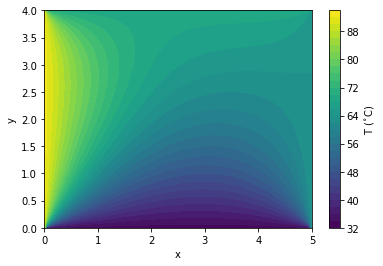

In [553]:
X, Y = np.meshgrid(x_space,y_space,indexing='ij')
plt.contourf(X,Y,T,30)
cbar=plt.colorbar()
cbar.ax.set_ylabel('T ($^{\circ}$C)')
plt.xlabel('x')
plt.ylabel('y')

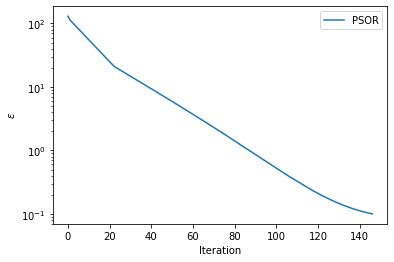

In [554]:
plt.plot(np.linspace(0,k,k+1),eps,label='PSOR')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$\epsilon$')
plt.legend()

In [555]:
dict ={'Method':['Jacobi','PGS','PSOR','LGS'],'Iteration':[jacobi_iteration,PGS_iteration,PSOR_iteration,LGS_iteration]}
df = pd.DataFrame.from_dict(dict)
df

,Method,Iteration
0,Jacobi,2911
1,PGS,2008
2,PSOR,146
3,LGS,2008
